In [21]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading NPZ files

In [147]:
sklearn.__version__

'1.2.2'

In [3]:
X_tra = np.load(r"C:\Users\vaibh\OneDrive\Desktop\X_kannada_MNIST_train.npz")
X_tes = np.load(r"C:\Users\vaibh\OneDrive\Desktop\X_kannada_MNIST_test.npz")
y_tra = np.load(r"C:\Users\vaibh\OneDrive\Desktop\y_kannada_MNIST_train.npz")
y_tes = np.load(r"C:\Users\vaibh\OneDrive\Desktop\y_kannada_MNIST_test.npz")

# Getting lists of arrays present in the npz files

In [4]:
X_train_list = X_tra.files
X_test_list = X_tes.files
y_train_list = y_tra.files
y_test_list = y_tes.files

# df1 = X_Train

In [84]:
arrays ={}
for i in X_train_list:
    arrays[i]=X_tra[i]
data =arrays['arr_0']  
X_train = pd.DataFrame(data.reshape(data.shape[0], -1))
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# df2 = X_test

In [85]:
arrays ={}
for i in X_test_list:
    arrays[i]=X_tes[i]
data =arrays['arr_0']  
X_test = pd.DataFrame(data.reshape(data.shape[0], -1))
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# df3= y_train

In [86]:
arrays ={}
for i in y_train_list:
    arrays[i]=y_tra[i]
data =arrays['arr_0']  
y_train = pd.DataFrame(data.reshape(data.shape[0], -1))
y_train

,0
0,0
1,1
2,2
3,3
4,4
...,...
59995,5
59996,6
59997,7
59998,8


# df4 = y_test

In [87]:
arrays ={}
for i in y_test_list:
    arrays[i]=y_tes[i]
data =arrays['arr_0']  
y_test = pd.DataFrame(data.reshape(data.shape[0], -1))
y_test

,0
0,0
1,1
2,2
3,3
4,4
...,...
9995,5
9996,6
9997,7
9998,8


In [73]:
X_train.shape

(60000, 784)

# Now applying pca for 15 components

In [134]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

# Now train the data using Decision tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.8116
Precision : 0.8116
Recall : 0.8116
F1 Score : 0.8115999999999999
Confusion Matrix:
[[744 140   5  40   9   8   1   8  38   7]
 [ 94 825   4  27   5  24   3   9   7   2]
 [  6   3 976   2   0  10   1   0   2   0]
 [ 15  12   6 772  51  38  28  66   3   9]
 [  0   3   0  39 834  53   9   9  36  17]
 [  1  10   2  35 154 756  13  10  12   7]
 [  5   4   1  37  16   9 792 106  13  17]
 [ 12  14   2  71  18  12 132 696  13  30]
 [ 57   9   4   6  10  25   4   4 852  29]
 [ 19  15   1   3  17   3   6   6  61 869]]
ROC AUC Score: 0.8953333333333333


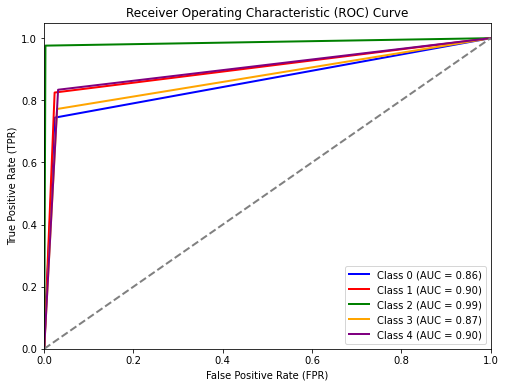

In [153]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve , auc

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# PCA for 20 components

In [159]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 20)

In [160]:
# Training the model over decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.8203
Precision : 0.8203
Recall : 0.8203
F1 Score : 0.8203
Confusion Matrix:
[[760 144   6  31   3   5   2   5  37   7]
 [ 56 852   6  39   8  19   2   7   9   2]
 [  3   4 983   2   0   7   0   0   1   0]
 [ 16  19   3 790  34  38  24  61   5  10]
 [  2   6   4  50 826  48   5   6  35  18]
 [  5   8   5  32 148 761  13  10  10   8]
 [  3   9   1  53  15   8 786  90  24  11]
 [ 26   7   1  64  19  12 133 697  11  30]
 [ 57  14   3  11  11  12   3   0 864  25]
 [  9  14   1   4  18   4   4   3  59 884]]
ROC AUC Score: 0.9001666666666666


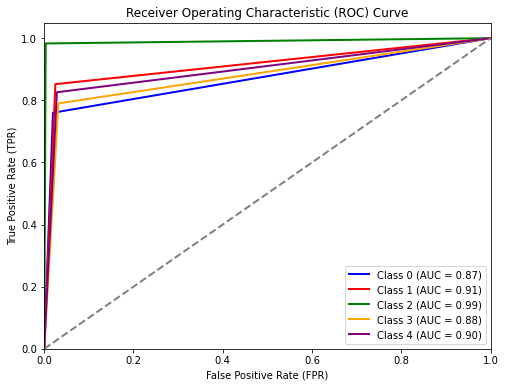

In [161]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions
# Calculate the ROC AUC score
y_pred_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# PCA for 25 components

In [166]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 25)

In [167]:
# Training the model over decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.8215
Precision : 0.8215
Recall : 0.8215
F1 Score : 0.8215
Confusion Matrix:
[[743 134   6  34  11   5   2  11  46   8]
 [ 55 855   9  35   4  16   4   5  12   5]
 [  4   2 985   2   1   5   1   0   0   0]
 [ 19  11   5 763  39  44  37  65  10   7]
 [  1   6   0  35 837  46   5   9  37  24]
 [  7   8   3  26 130 783  11  12  14   6]
 [  4   5   2  36  19   8 802  84  23  17]
 [ 14   6   1  62  35  11 137 693  15  26]
 [ 54   9   3   9  12  18   2   1 867  25]
 [ 12  10   1   3  25   0   2   5  55 887]]
ROC AUC Score: 0.9008333333333333


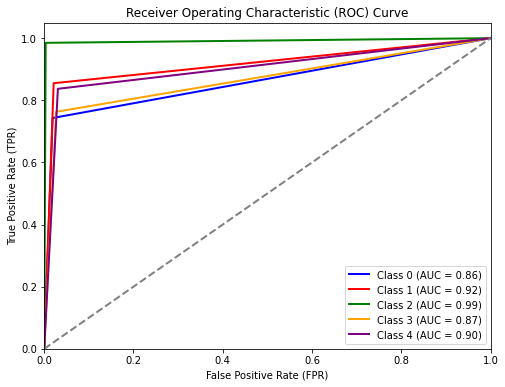

In [168]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions
# Calculate the ROC AUC score
y_pred_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# PCA for 30 components

In [174]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 30)

In [175]:
# Training the model over decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.8211
Precision : 0.8211
Recall : 0.8211
F1 Score : 0.8211
Confusion Matrix:
[[761 127   4  40  13   7   2  11  30   5]
 [ 58 854   6  27  10  19   4  11   4   7]
 [  5   2 983   3   1   5   0   0   1   0]
 [ 16  14   3 780  35  32  42  63   5  10]
 [  2   9   2  34 831  55   5   9  35  18]
 [  3   4   6  42 126 772  15  12  12   8]
 [  7   6   2  37  21   7 783 102  18  17]
 [ 18  11   1  77  35   6 111 710   9  22]
 [ 65  15   4  10   8  17   3   1 853  24]
 [ 11  15   0   2  22   3   5   5  53 884]]
ROC AUC Score: 0.900611111111111


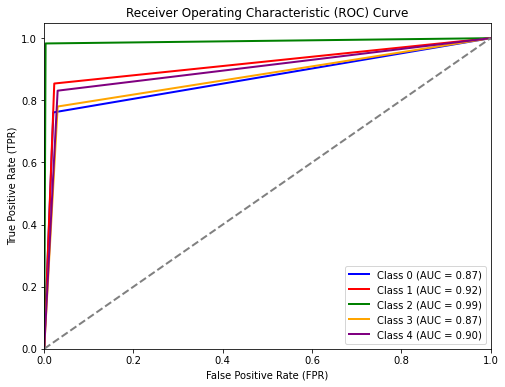

In [176]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Conclusion Accuracy is 82.15% for Decision tree for 25 components whihc is the highest among others

In [182]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

# Random Forest 

In [184]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

C:\Users\vaibh\AppData\Local\Temp/ipykernel_17300/2138054721.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy:  0.8844
Precision : 0.8844
Recall : 0.8844
F1 Score : 0.8844
Confusion Matrix:
[[797 151   0  33   2   1   0   3  10   3]
 [ 22 930   1  25   5   9   0   3   3   2]
 [  3   2 993   1   0   1   0   0   0   0]
 [  8  12   2 903  13  23   7  31   1   0]
 [  0   1   0  25 899  26   3   2  37   7]
 [  0   2   0  15 158 810   0   7   6   2]
 [  2   8   0  25  18   7 870  49  13   8]
 [  7  10   0  47  25   6 111 770   6  18]
 [ 27   4   2   0   4   5   0   0 951   7]
 [  4   5   0   3  14   0   2   3  48 921]]
ROC AUC Score: 0.9900361277777778


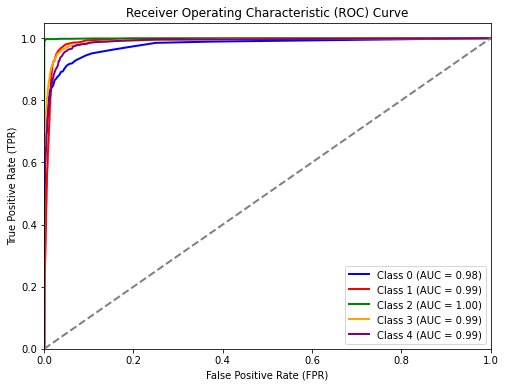

In [185]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions
# Calculate the ROC AUC score
y_pred_proba = rf_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# For 20 components

In [190]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 20)

In [191]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

C:\Users\vaibh\AppData\Local\Temp/ipykernel_17300/2138054721.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy:  0.8941
Precision : 0.8941
Recall : 0.8941
F1 Score : 0.8941
Confusion Matrix:
[[810 142   0  26   6   1   1   3   8   3]
 [ 18 936   1  27   3   9   0   0   2   4]
 [  3   1 994   1   0   1   0   0   0   0]
 [  5  12   2 900  13  22   4  40   2   0]
 [  0   1   0  19 919  19   2   0  36   4]
 [  0   3   0  14 141 831   0   4   5   2]
 [  4   6   0  21  22   6 889  32  11   9]
 [  9   9   0  33  29   7 114 778   6  15]
 [ 23   3   3   0   2   5   1   0 955   8]
 [  3   5   0   2   9   0   2   3  47 929]]
ROC AUC Score: 0.9914249666666667


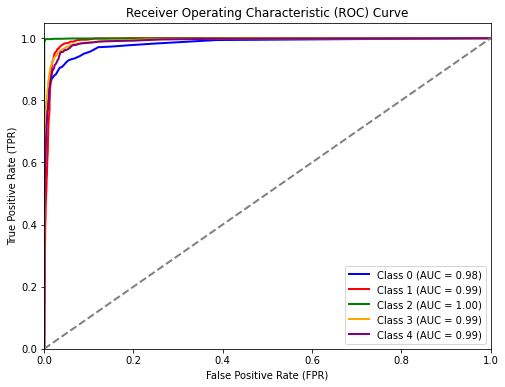

In [192]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = rf_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# for 25 components

In [198]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 25)

In [199]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

C:\Users\vaibh\AppData\Local\Temp/ipykernel_17300/2138054721.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy:  0.894
Precision : 0.894
Recall : 0.894
F1 Score : 0.894
Confusion Matrix:
[[811 137   0  23   5   1   0   6  14   3]
 [ 18 931   1  26   5  11   0   2   2   4]
 [  2   1 992   1   0   4   0   0   0   0]
 [  8  13   0 902  16  22   6  32   1   0]
 [  0   1   0  19 917  20   1   1  36   5]
 [  0   2   0  12 145 827   0   6   7   1]
 [  3   6   0  18  22   4 883  41  13  10]
 [  8   6   0  25  26   7 111 794   6  17]
 [ 25   2   2   0   2   5   1   0 955   8]
 [  2   3   0   0  10   0   2   4  51 928]]
ROC AUC Score: 0.9918762666666666


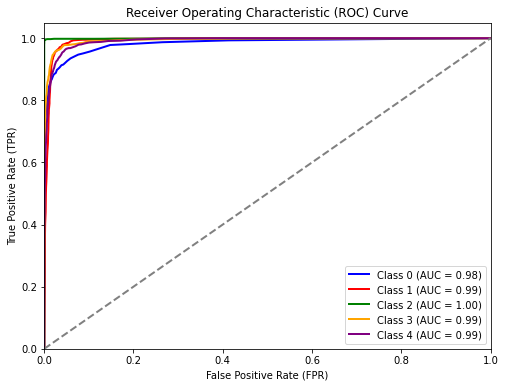

In [200]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = rf_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# for 30 components

In [205]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 30)

In [206]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

C:\Users\vaibh\AppData\Local\Temp/ipykernel_17300/2138054721.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy:  0.8981
Precision : 0.8981
Recall : 0.8981
F1 Score : 0.8981
Confusion Matrix:
[[816 138   0  24   3   1   3   2  10   3]
 [ 16 941   1  21   4   8   0   2   3   4]
 [  2   1 993   1   0   3   0   0   0   0]
 [  7  14   2 905  12  21   7  31   1   0]
 [  0   1   0  16 920  22   1   1  35   4]
 [  0   1   0  10 139 839   1   5   4   1]
 [  3   3   0  17  26   4 888  37  11  11]
 [  7   6   0  23  27  10 108 795   7  17]
 [ 19   4   2   1   1   5   1   0 960   7]
 [  3   3   0   1  15   0   2   1  51 924]]
ROC AUC Score: 0.9920173277777777


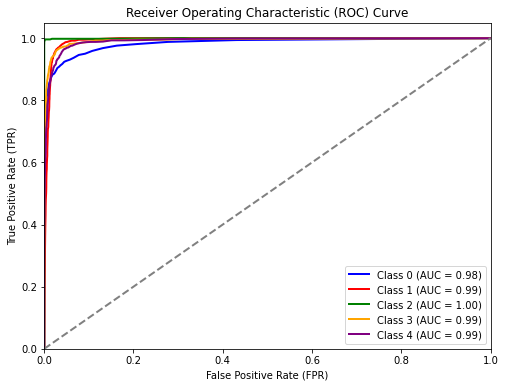

In [207]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = rf_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Conclusion :- Accuracy is 89.81% with 30 components which is highest among others.

In [212]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

In [215]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.7453
Precision : 0.7453
Recall : 0.7453
F1 Score : 0.7453
Confusion Matrix:
[[684 158   9  95  12   0   0   7  27   8]
 [ 25 714  16 170  14   4   1  37   7  12]
 [  3   6 982   3   0   4   0   0   2   0]
 [  9   7   2 872  26  25  15  43   1   0]
 [  0   1   0  50 851  49   3   3  32  11]
 [  0   0   3  62 260 611   2  25  35   2]
 [  3   2   1  58  24   7 790  83  26   6]
 [ 19   5   1 341  53   4 172 392   6   7]
 [187  26   2   5   7   6   3   1 736  27]
 [ 12   1   2  37  57   0   0   2  68 821]]
ROC AUC Score: 0.9575051777777779


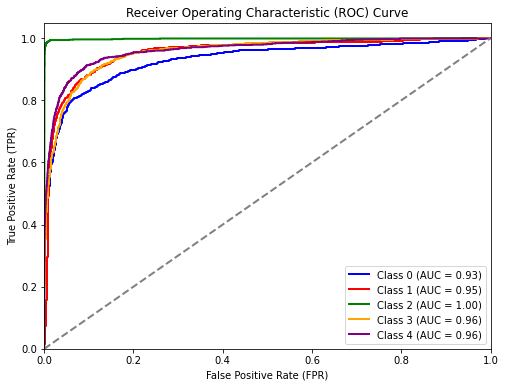

In [216]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# for 20 components

In [221]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 20)

In [222]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.7538
Precision : 0.7538
Recall : 0.7538
F1 Score : 0.7537999999999999
Confusion Matrix:
[[701 148  14  79  13   1   0   5  33   6]
 [ 24 698  35 180   8   9   2  11  23  10]
 [  4   5 980   2   0   7   0   1   1   0]
 [ 10  10   3 879  19  21  16  41   1   0]
 [  0   1   1  41 864  49   3   1  29  11]
 [  0   1   8  91 240 594   1  23  40   2]
 [  4   1  12  46  22   8 791  73  36   7]
 [ 22   9   3 319  42   4 165 419   9   8]
 [198  20   2   4   9   4   0   1 733  29]
 [  6   1   1   8  41   0   0   3  61 879]]
ROC AUC Score: 0.955726761111111


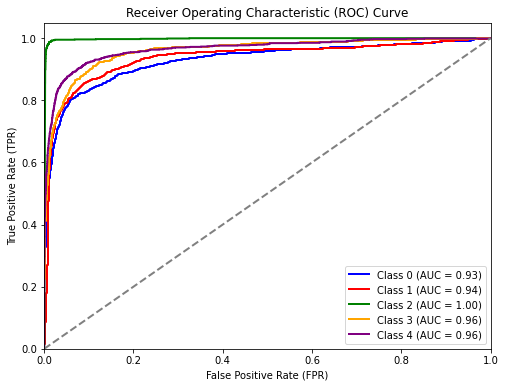

In [223]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# for 25 components

In [228]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 25)

In [229]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.7591
Precision : 0.7591
Recall : 0.7591
F1 Score : 0.7591000000000001
Confusion Matrix:
[[706 143  14  74  18   1   0   5  31   8]
 [ 24 693  46 166  17  11   2  14  17  10]
 [  6   4 978   3   0   8   0   0   1   0]
 [ 11   9   3 863  37  22  17  37   1   0]
 [  0   1   1  36 869  47   1   2  29  14]
 [  0   2  11  75 244 603   2  21  40   2]
 [  4   2  21  38  28   8 788  67  36   8]
 [ 23   9  10 251  57   3 147 485  10   5]
 [184  15   4   2   9   3   0   2 742  39]
 [  4   2   0   9  52   0   1   4  64 864]]
ROC AUC Score: 0.9543404833333332


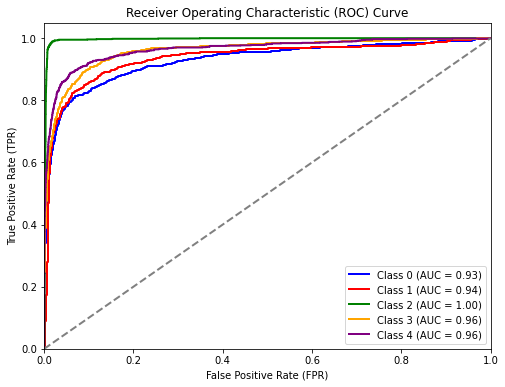

In [230]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# for 30 components

In [235]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 30)

In [236]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.7533
Precision : 0.7533
Recall : 0.7533
F1 Score : 0.7533
Confusion Matrix:
[[711 137  14  75  17   1   0   5  33   7]
 [ 29 681  46 172  16  11   5  11  21   8]
 [  5   2 982   3   0   7   0   0   1   0]
 [ 11   7   4 867  31  23  17  38   2   0]
 [  0   1   1  31 869  52   1   2  28  15]
 [  0   2  10  88 244 584   2  20  47   3]
 [  4   0   2  39  30   8 798  74  40   5]
 [ 27   7  13 297  55   6 134 443  14   4]
 [189  14   1   2   9   4   0   1 748  32]
 [  7   3   1  10  60   1   1   3  64 850]]
ROC AUC Score: 0.9511008999999999


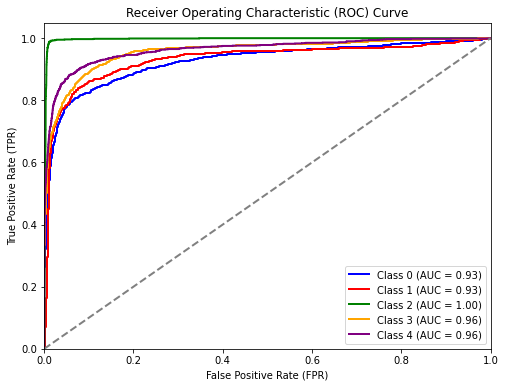

In [237]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the ROC AUC score
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Calculate the FPR, TPR, and Thresholds for the ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
n_classes = y_pred_proba.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Conclusion :- Accuracy is 75.91% with 25 components which is highest among others.

# Using K-NN Algorithm for 15 components

In [65]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.8972
Precision : 0.8972
Recall : 0.8972
F1 Score : 0.8972
Confusion Matrix:
[[814 155   0  20   2   0   0   3   5   1]
 [ 21 949   0  16   5   4   1   2   1   1]
 [  2   1 992   1   0   3   0   0   1   0]
 [ 12  13   4 877  27  25   5  36   1   0]
 [  1   1   0  10 936  24   2   1  22   3]
 [  1   2   2  11 132 845   1   3   3   0]
 [  4   8   0  11  25   4 891  45   6   6]
 [ 11  11   0  47  24   2 122 770   4   9]
 [ 19   5   0   0   6   1   2   0 960   7]
 [  3  10   0   0  16   0   4   4  25 938]]


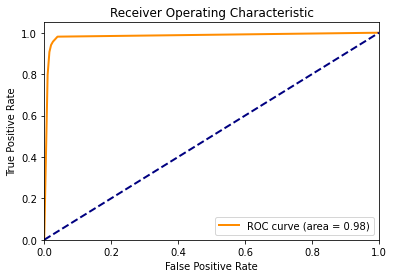

In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Predict probabilities for the positive class
y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# for 20 components

In [74]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 20)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.9072
Precision : 0.9072
Recall : 0.9072
F1 Score : 0.9072
Confusion Matrix:
[[838 132   0  16   2   0   0   4   8   0]
 [ 12 957   0  18   4   4   1   1   1   2]
 [  2   1 992   1   0   4   0   0   0   0]
 [  7  16   2 892  17  22   6  36   2   0]
 [  1   0   0   7 945  20   5   0  18   4]
 [  0   1   0   9 124 858   3   3   1   1]
 [  4   4   0  13  23   5 903  30  11   7]
 [ 13   7   0  38  29   5 116 784   4   4]
 [ 20   4   0   0   5   1   1   0 961   8]
 [  2  10   0   0  15   0   3   2  26 942]]


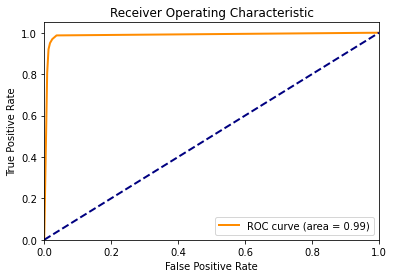

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# for 25 components

In [81]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 25)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.9121
Precision : 0.9121
Recall : 0.9121
F1 Score : 0.9121
Confusion Matrix:
[[835 133   0  15   5   0   1   2   7   2]
 [ 15 961   0  13   3   4   1   0   1   2]
 [  2   2 993   0   0   3   0   0   0   0]
 [ 10  15   1 898  22  22   4  27   1   0]
 [  1   0   1   4 951  18   3   1  18   3]
 [  0   0   0   8 110 876   2   1   2   1]
 [  5   3   0  14  26   4 899  28  16   5]
 [  7   4   1  24  34   7 121 792   5   5]
 [ 16   2   0   0   3   1   1   0 967  10]
 [  3   9   0   0   7   0   2   3  27 949]]


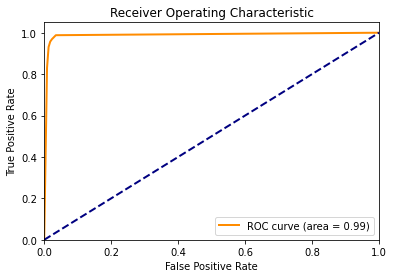

In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# for 30 components

In [88]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 30)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.914
Precision : 0.914
Recall : 0.914
F1 Score : 0.914
Confusion Matrix:
[[839 129   0  16   5   0   1   1   7   2]
 [ 16 960   0  12   4   3   1   1   1   2]
 [  2   1 995   0   0   2   0   0   0   0]
 [ 13  15   1 897  19  22   7  25   1   0]
 [  1   0   1   6 950  18   2   1  17   4]
 [  0   0   0   9 103 882   0   2   3   1]
 [  4   2   0  13  27   1 908  27  14   4]
 [ 11   3   1  24  35   5 104 805   5   7]
 [ 18   3   0   0   4   1   1   0 965   8]
 [  4  12   0   0  11   0   3   1  30 939]]


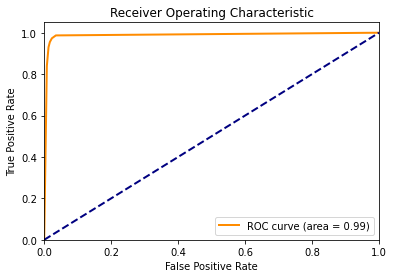

In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion :- Accuracy is 91.45% with 30 components which is highest among others.

# using SVM algorithm for 15 components

In [30]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 15)

In [31]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9047
Precision : 0.9047
Recall : 0.9047
F1 Score : 0.9047
Confusion Matrix:
[[817 133   1  30   3   0   1   2  10   3]
 [ 16 937   1  26   3   5   1   4   5   2]
 [  2   1 995   1   0   1   0   0   0   0]
 [  7  14   3 895  14  20   4  43   0   0]
 [  0   0   0   6 949  15   3   1  22   4]
 [  1   1   0   7 134 849   1   2   4   1]
 [  3  10   0  19  25   4 889  36   5   9]
 [ 13  12   0  29  18   3 108 799   5  13]
 [ 10   2   1   0   2   0   1   0 977   7]
 [  5   8   0   1  18   0   1   1  26 940]]


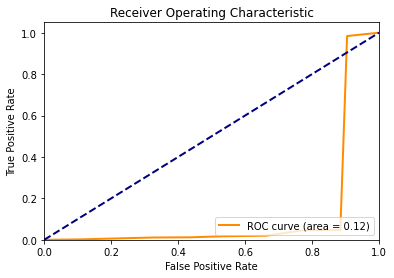

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,auc

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# for 20 components

In [44]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 20)

In [45]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9147
Precision : 0.9147
Recall : 0.9147
F1 Score : 0.9147
Confusion Matrix:
[[845 116   1  25   3   0   1   2   4   3]
 [ 14 942   3  23   3   3   1   4   5   2]
 [  2   1 994   1   0   2   0   0   0   0]
 [  7  12   4 908  16  16   6  31   0   0]
 [  0   0   1   8 947  17   3   2  17   5]
 [  0   0   2   6 126 862   0   1   3   0]
 [  2   5   0  18  24   6 914  19   6   6]
 [ 15  11   1  23  14   4 106 808   8  10]
 [  6   2   1   0   3   0   1   0 983   4]
 [  2   9   0   0  15   0   1   3  26 944]]


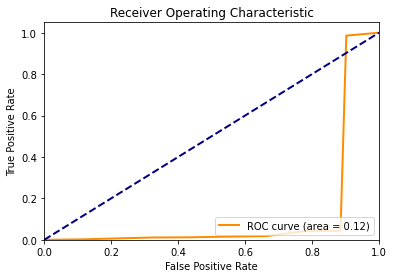

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,auc

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# for 25 components

In [51]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 25)

In [52]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9179
Precision : 0.9179
Recall : 0.9179
F1 Score : 0.9179
Confusion Matrix:
[[840 122   1  21   5   0   0   2   7   2]
 [ 14 944   4  17   2   4   1   4   5   5]
 [  2   1 996   1   0   0   0   0   0   0]
 [  6   8   4 902  17  20   5  37   1   0]
 [  1   0   1   7 946  19   2   1  19   4]
 [  0   0   3   6 112 875   0   0   4   0]
 [  4   6   1  15  23   5 920  14   6   6]
 [ 14   9   2  22  22   2  89 821   4  15]
 [  3   0   0   0   2   0   0   0 988   7]
 [  4  11   0   0  11   0   1   1  25 947]]


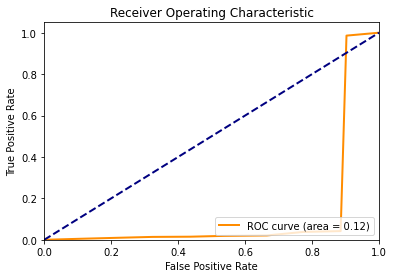

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# for 30 components

In [58]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Mean centric the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

(60000, 30)

In [59]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9226
Precision : 0.9226
Recall : 0.9226
F1 Score : 0.9226
Confusion Matrix:
[[848 117   1  19   4   0   1   2   6   2]
 [ 13 946   5  18   4   3   1   3   5   2]
 [  3   0 996   0   0   1   0   0   0   0]
 [  6   7   5 912  14  20   5  30   1   0]
 [  1   0   1  10 953  12   2   0  16   5]
 [  0   0   4   5 105 880   0   2   4   0]
 [  3   3   1  14  23   4 929  13   4   6]
 [ 15   9   3  21  18   4  86 826   3  15]
 [  3   1   1   0   2   0   1   0 986   6]
 [  3   9   0   0   9   0   1   2  26 950]]


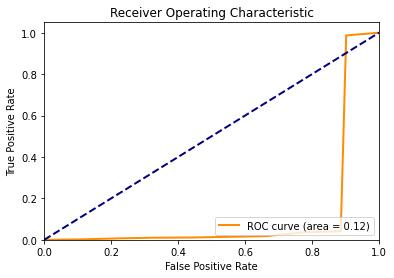

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Diagonal elements shows the correct predictions

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion :- Accuracy is 92.26% with 30 components which is highest among others.

# Overall Conclusion :- Accuracy is 92.24% with 30 components which is highest among others for SVM and lowest 75.84% for naive_bayes

# So best algorithm for this is SVM with 30 components